[*********************100%***********************]  1 of 1 completed


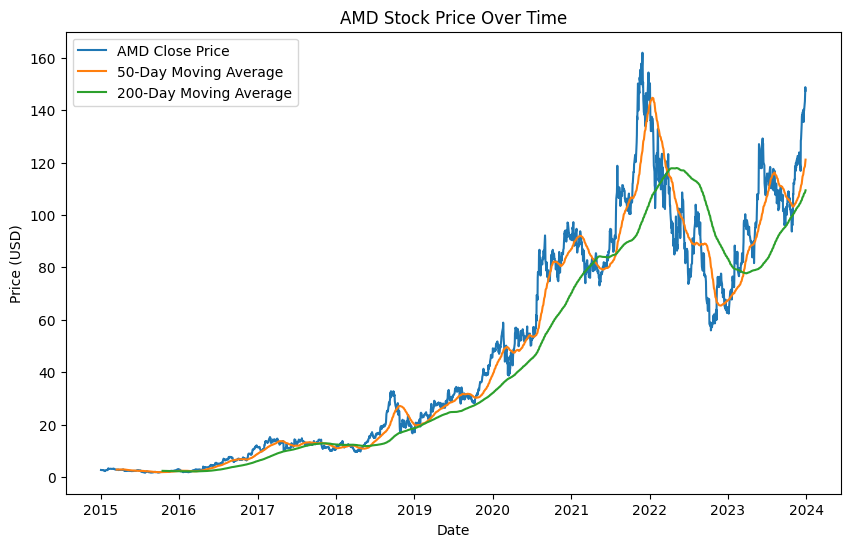

In [10]:
# Import libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download stock data
ticker = 'AMD'
start_date = '2015-01-01'
end_date = '2024-01-01'
stock_data = yf.download(ticker, start=start_date, end=end_date)
'''
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)
'''
# Set the frequency to daily (or 'B' for business days)
#stock_data = stock_data.asfreq('B')

# Explore the data
stock_data.head()

# Add moving averages (short = 50 days, long = 200 days)
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA_200'] = stock_data['Close'].rolling(window=200).mean()

# Visualize stock price trends
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label=f'{ticker} Close Price')
plt.plot(stock_data['MA_50'], label='50-Day Moving Average')
plt.plot(stock_data['MA_200'], label='200-Day Moving Average')
plt.title(f'{ticker} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()



# Save preprocessed data
stock_data.to_csv('../data/preprocessed_stock_data.csv')